**Informações sobre os atributos:**

**Class Values:**

As classes estão divididas em 
"Unacceptable" (unacc), "Acceptable" (acc),"Good" (good) e "Very Good" (vgood)

**Attributes:**

* buying: vhigh, high, med, low. (preço do veiculo - muito alto, alto, médio e baixo)
* maint: vhigh, high, med, low. (preço da manutenção - muito alto, alto, médio e baixo)
* doors: 2, 3, 4, 5more. (quantidade de portas)
* persons: 2, 4, more. (capacidade do veiculo)
* lug_boot: small, med, big. (tamanho do porta malas)
* safety: low, med, high. (Segurança do veiculo) 

In [1]:
# bibliotecas utilizadas
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# carregando o arquivo csv
carros =  pd.read_csv('datasets/car.data', sep=",", header=0)
print(carros)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


In [3]:
carros.columns = ['Preco_Veiculo', 'Manutencao', 'Portas','Capacidade','Porta_Malas','Seguranca','Avaliacao']

In [4]:
carros.head()

,Preco_Veiculo,Manutencao,Portas,Capacidade,Porta_Malas,Seguranca,Avaliacao
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
carros.isna().sum()

Preco_Veiculo    0
Manutencao       0
Portas           0
Capacidade       0
Porta_Malas      0
Seguranca        0
Avaliacao        0
dtype: int64

In [6]:
carros.isnull().sum()

Preco_Veiculo    0
Manutencao       0
Portas           0
Capacidade       0
Porta_Malas      0
Seguranca        0
Avaliacao        0
dtype: int64

In [7]:
# Separando os dados e classes
X = carros.drop("Avaliacao", axis = 1)
y = carros.Avaliacao

### SVM ###

In [ ]:
# Aplicar SMOTE ou RandomOverSampler para balanceamento 
from imblearn.over_sampling import SMOTE

X = carros.drop("Avaliacao", axis = 1)
y = carros.Avaliacao

# LabelEncoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["Preco_Veiculo", "Manutencao","Portas","Capacidade", "Porta_Malas", "Seguranca"]

df_col=list(colunas)

for i in range(len(df_col)):
    X[df_col[i]] = le.fit_transform(X[df_col[i]])
    
# SMOTE

smt = SMOTE()
X, y = smt.fit_resample(X, y)
ax = sns.countplot(x=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

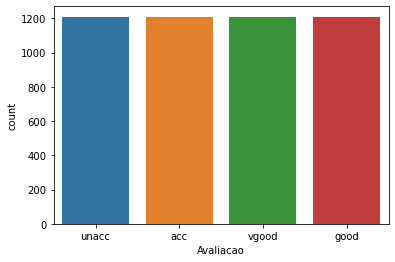

In [8]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()

X = carros.drop("Avaliacao", axis = 1)
y = carros.Avaliacao

# Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["Preco_Veiculo", "Manutencao","Portas","Capacidade", "Porta_Malas", "Seguranca"]

df_col=list(colunas)

for i in range(len(df_col)):
    X[df_col[i]] = le.fit_transform(X[df_col[i]])
    
# OverSample

X, y = oversample.fit_resample(X, y)
ax = sns.countplot(x=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [9]:
from sklearn import svm
clf = svm.SVC().fit(X_train,y_train)

In [10]:
predicao = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (classification_report(y_test, predicao))

              precision    recall  f1-score   support

         acc       0.96      0.98      0.97       302
        good       0.99      1.00      0.99       303
       unacc       1.00      0.96      0.98       302
       vgood       1.00      1.00      1.00       302

    accuracy                           0.99      1209
   macro avg       0.99      0.99      0.99      1209
weighted avg       0.99      0.99      0.99      1209



Confusion Matrix


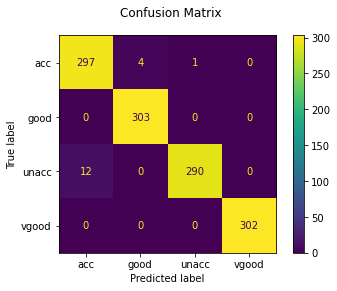

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(clf,X_test,y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion Matrix')
plt.show()

### Tunning SVM ###

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svm = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
predicao = grid_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print (classification_report(y_test, predicao))

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(grid_svm,X_test,y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion Matrix')
plt.show()

### Final ###

In [ ]:
carros.head()

In [ ]:
#Criando um dataframe final - Melhores resultados com SVM e utilizando a tecnica RandomOverSampling
final = carros.drop("Avaliacao", axis = 1)

# LabelEncoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["Preco_Veiculo", "Manutencao","Portas","Capacidade", "Porta_Malas", "Seguranca"]

df_col=list(colunas)

for i in range(len(df_col)):
    final[df_col[i]] = le.fit_transform(final[df_col[i]])
final.head()

In [ ]:
predicao = grid_svm.predict(final)

In [ ]:
final['Avaliacao'] = predicao

In [ ]:
# Muito alto, alto, médio e baixo
decode_col = {"Preco_Veiculo":     {0: "Baixo", 1: "Médio", 2: "Alto", 3: "Muito Alto"},
                    "Manutencao":  {0: "Baixo", 1: "Médio", 2: "Alto", 3: "Muito Alto"},
                    "Portas":  {0: "2 portas", 1: "3 portas", 2: "4 portas", 3: "+5 portas"},
                    "Capacidade": {0: "2 pessoas", 1: "4 pessoas", 2: "+4 pessoas"},
                    "Porta_Malas": {0: "Grande", 1: "Médio", 2: "Pequeno"},
                    "Seguranca": {0: "Alta", 1: "Média", 2: "Baixa"},
                    "Avaliacao": {"unacc": "Inaceitável", "acc": "Aceitável", "good": "Boa", "vgood": "Muito boa"}}

In [ ]:
dataset_final = final.replace(decode_col)
dataset_final.head()

In [ ]:
# Grande parte do modelo previsto possui veiculos em condições inaceitáveis ou aceitáveis
sns.countplot(x = 'Avaliacao', data = dataset_final,
             order = dataset_final['Avaliacao'].value_counts().index)

In [ ]:
# Exportando a base finalizada
dataset_final.to_csv('datasets/resultados_previstos.csv', sep=';', encoding='iso-8859-1')